In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()

def plotGraph3(pdf, pscaled1, pscaled2):
    fig, (a, b, c) = plt.subplots(ncols=3, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    plt.show()

In [31]:
np.random.seed(1)
NBROWS = 5000
df = pd.DataFrame({
    'A': np.random.normal(0, 2, NBROWS),
    'B': np.random.normal(5, 3, NBROWS),
    'C': np.random.normal(-5, 5, NBROWS),  
    'D': np.random.chisquare(8, NBROWS),
    'E': np.random.beta(8, 2, NBROWS) * 40,
    'F': np.random.normal(5, 3, NBROWS)
})
df.head(5)

,A,B,C,D,E,F
0,3.248691,2.225734,-5.612370,11.097213,28.505063,8.746520
1,-1.223513,8.386670,-3.859151,3.891012,30.301036,4.269372
2,-1.056344,1.613626,-6.761526,11.131175,34.912442,6.480505
3,-2.145937,2.825787,-9.152767,14.546524,30.378274,3.090629
4,1.730815,6.870714,-6.305449,5.209203,29.553652,2.953848


## Utilisation de StandardScaler

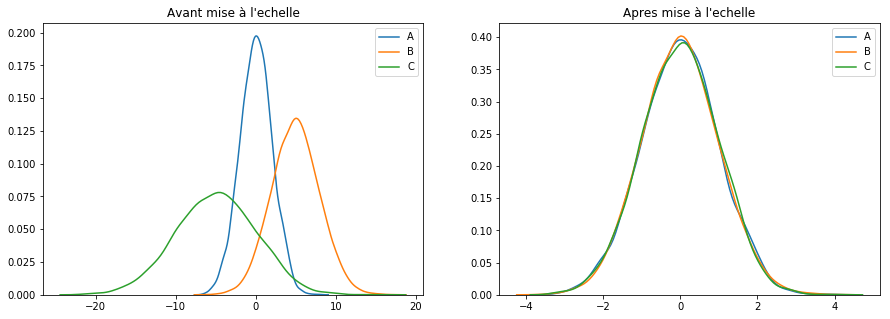

In [32]:
scaler = StandardScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## Utilisation de MinMaxScaler

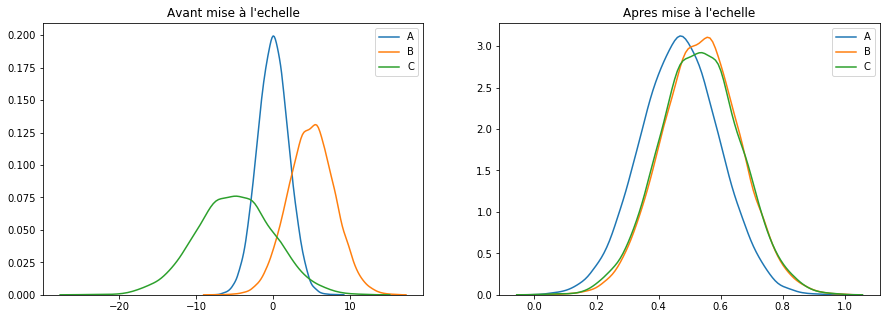

In [27]:
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## Utilisation de RobustScaler

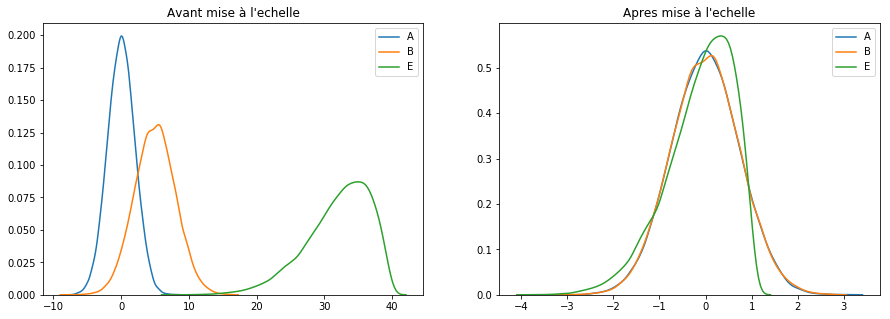

In [28]:
scaler = RobustScaler()
keepCols = ['A', 'B', 'E']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

### Comparaison avec MinMaxScaler

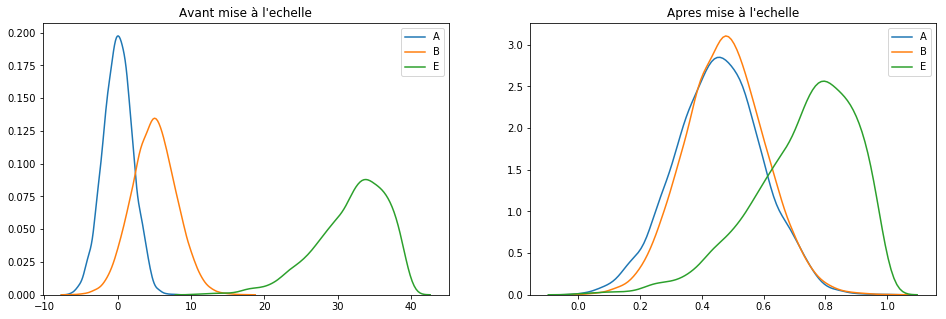

In [44]:
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'E']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

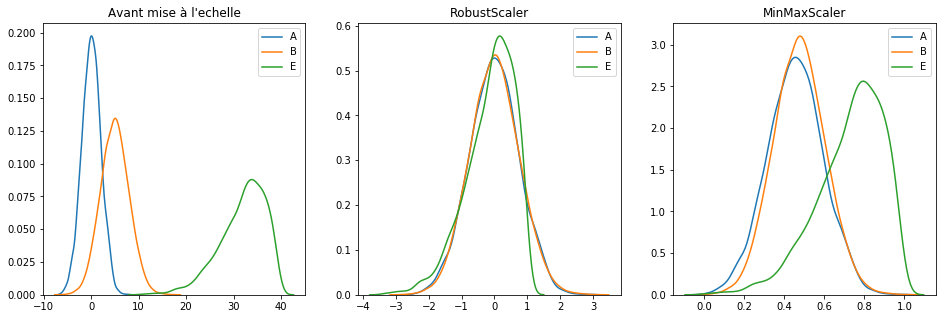

In [48]:
scaler1 = RobustScaler()
scaler2 = MinMaxScaler()
keepCols = ['A', 'B', 'E']
dfscaler1 = scaler1.fit_transform(df[keepCols])
dfscaler1 = pd.DataFrame(dfscaler1, columns=keepCols)
dfscaler2 = scaler2.fit_transform(df[keepCols])
dfscaler2 = pd.DataFrame(dfscaler2, columns=keepCols)
plotGraph3(df[keepCols], dfscaler1, dfscaler2)